In [1]:
#!/bin/env python
#coding: utf-8

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28 * 28
n_noise = 128

X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))

G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))

D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))


def generator(noise_z):
	hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
	output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)

	return output


def discriminator(inputs):
	hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
	output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)

	return output


def get_noise(batch_size, n_noise):
	return np.random.normal(size=(batch_size, n_noise))


G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

# loss_D and loss_G <= 0
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
loss_G = tf.reduce_mean(tf.log(D_gene))

D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
	for i in range(total_epoch):
		batch_xs, batch_ys = mnist.train.next_batch(batch_size)
		noise = get_noise(batch_size, n_noise)

		_, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
		_, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

	print(
		'Epoch:', '%04d' % epoch,
		'D loss: {:.4}'.format(loss_val_D),
		'G loss: {:.4}'.format(loss_val_G)
	)

	if epoch == 0 or (epoch + 1) % 10 == 0:
		sample_size = 10
		noise = get_noise(sample_size, n_noise)
		samples = sess.run(G, feed_dict={Z: noise})

		fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

		for i in range(sample_size):
			ax[i].set_axis_off()
			ax[i].imshow(np.reshape(samples[i], (28, 28)))
            
		plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
		plt.close(fig)
	
print('Optimization Complete!')

Epoch: 0000 D loss: -0.146 G loss: -3.578
Epoch: 0001 D loss: -0.688 G loss: -3.013
Epoch: 0002 D loss: -0.8066 G loss: -1.673
Epoch: 0003 D loss: -0.7434 G loss: -1.803
Epoch: 0004 D loss: -0.5027 G loss: -1.95
Epoch: 0005 D loss: -0.6114 G loss: -2.087
Epoch: 0006 D loss: -0.3927 G loss: -2.334
Epoch: 0007 D loss: -0.2641 G loss: -2.493
Epoch: 0008 D loss: -0.2051 G loss: -2.673
Epoch: 0009 D loss: -0.2567 G loss: -2.514
Epoch: 0010 D loss: -0.443 G loss: -2.114
Epoch: 0011 D loss: -0.3034 G loss: -2.385
Epoch: 0012 D loss: -0.1871 G loss: -2.755
Epoch: 0013 D loss: -0.2329 G loss: -2.572
Epoch: 0014 D loss: -0.1333 G loss: -3.007
Epoch: 0015 D loss: -0.1477 G loss: -2.838
Epoch: 0016 D loss: -0.2128 G loss: -2.422
Epoch: 0017 D loss: -0.2508 G loss: -2.397
Epoch: 0018 D loss: -0.4886 G loss: -1.939
Epoch: 0019 D loss: -0.4837 G loss: -1.81
Epoch: 0020 D loss: -0.5606 G loss: -1.576
Epoch: 0021 D loss: -0.3994 G loss: -1.806
Epoch: 0022 D loss: -0.3153 G loss: -1.887
Epoch: 0023 D lo

['000.png', '009.png', '019.png', '029.png', '039.png', '049.png', '059.png', '069.png', '079.png', '089.png', '099.png']


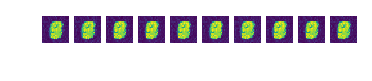

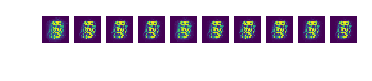

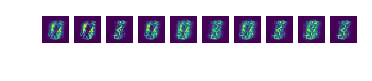

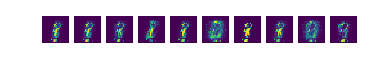

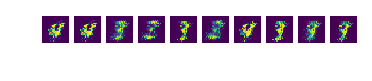

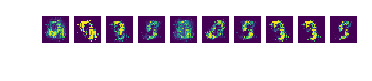

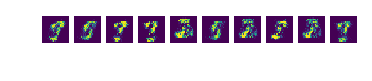

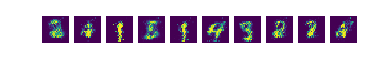

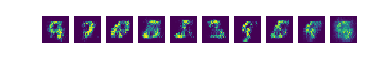

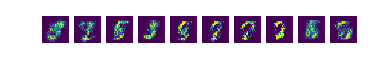

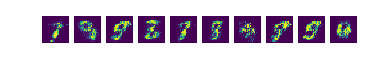

In [3]:
import matplotlib.image as mpimg

png_files = list(map(lambda x: '%03d.png' % x, [000] + [i*10 + 9 for i in range(10)]))
print(png_files)

for i in range(11):
    image = mpimg.imread('samples/' + png_files[i])
    plt.figure()
    plt.axis('off')
    plt.imshow(image)

    plt.show()